## Dog mask

In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

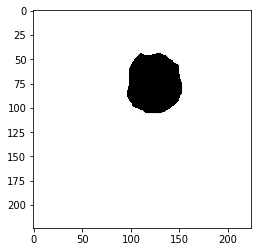

In [4]:
dog_face = cv2.imread('./faces/dog-face.png')
plt.imshow(dog_face)

In [5]:
dog_mask = (dog_face[:,:,0] == 0).astype(int)

In [6]:
dog_mask.shape

(224, 224)

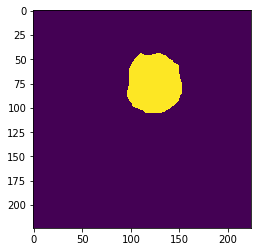

In [7]:
dog_line = dog_mask

dog_line = []

viridis = cm.get_cmap('viridis', 12)
plt.imshow(dog_mask, cmap=viridis)
plt.show()

## Cat mask

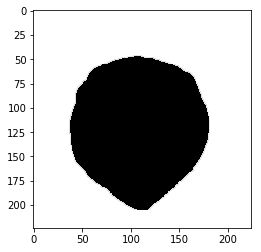

In [8]:
cat_face = cv2.imread('./faces/cat-face.png')
plt.imshow(cat_face)

In [9]:
cat_mask = (cat_face[:,:,0] == 0).astype(int)

In [10]:
cat_mask.shape

(224, 224)

## Person mask

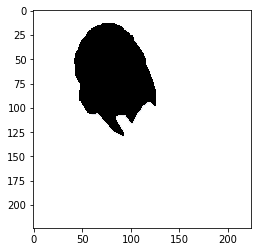

In [11]:
pers_face = cv2.imread('./faces/person-face.png')
plt.imshow(pers_face)

In [12]:
pers_mask = (pers_face[:,:,0] == 0).astype(int)

In [13]:
pers_mask.shape

(224, 224)

## Save masks

In [18]:
np.save('./faces/person-mask', pers_mask)
np.save('./faces/cat-mask', cat_mask)
np.save('./faces/dog-mask', dog_mask)

## Draw lines around areas

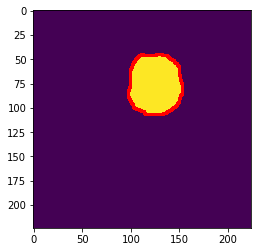

In [15]:
import numpy as np
import matplotlib.pyplot as plt


mapimg = (dog_face[:,:,0] == 0).astype(int)

ver_seg = np.where(mapimg[:,1:] != mapimg[:,:-1])

hor_seg = np.where(mapimg[1:,:] != mapimg[:-1,:])


l = []
for p in zip(*hor_seg):
    l.append((p[1], p[0]+1))
    l.append((p[1]+1, p[0]+1))
    l.append((np.nan,np.nan))

# and the same for vertical segments
for p in zip(*ver_seg):
    l.append((p[1]+1, p[0]))
    l.append((p[1]+1, p[0]+1))
    l.append((np.nan, np.nan))


segments = np.array(l)

x0 = 0
x1 =  224
y0 =0
y1 = 224

segments[:,0] = x0 + (x1-x0) * segments[:,0] / mapimg.shape[1]
segments[:,1] = y0 + (y1-y0) * segments[:,1] / mapimg.shape[0]

# and now there isn't anything else to do than plot it
plt.imshow(dog_mask, cmap=viridis)
plt.plot(segments[:,0], segments[:,1], color=(1,0,0), linewidth=3)

# Full Masks

## Dog full

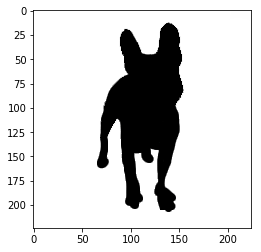

In [3]:
dog_full = cv2.imread('./full/dog-full.png')
plt.imshow(dog_full)

In [7]:
dog_mask = (dog_full[:,:,0] == 0).astype(int)

In [8]:
dog_mask.shape

(224, 224)

## Cat full

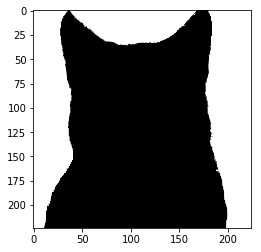

In [4]:
cat_full = cv2.imread('./full/cat-full.png')
plt.imshow(cat_full)

In [9]:
cat_mask = (cat_full[:,:,0] == 0).astype(int)
cat_mask.shape

(224, 224)

## Person full

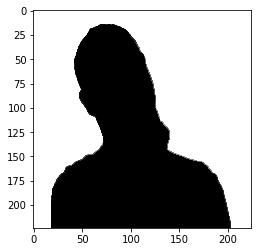

In [6]:
pers_full = cv2.imread('./full/person-full.png')
plt.imshow(pers_full)

In [10]:
pers_mask = (pers_full[:,:,0] == 0).astype(int)
pers_mask.shape

(224, 224)

## Save masks

In [11]:
np.save('./full/person-full', pers_mask)
np.save('./full/cat-full', cat_mask)
np.save('./full/dog-full', dog_mask)